In [ ]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pickle

In [ ]:
from glob import iglob 

In [ ]:
import numpy as np
import scanpy as sc
import scvi

Global seed set to 0


In [ ]:
import pandas as pd

In [ ]:
ad=sc.read('/home/xu_lahong/BrainAtlas/miao/V3/Oligo(PCDH9+).h5')
ad = ad[~ad.obs['study'].isin(['human_brain_source_Tran_2021','human_brain_CV_SunN_2022_10x']),:].copy()

In [ ]:
ad

AnnData object with n_obs × n_vars = 3582 × 36384
    obs: 'sample', 'doublet_score', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'cell_ID', 'seq_tech', 'organ', 'species', 'sample_type', 'reference', 'seq_method', 'project_code', 'region', 'subregion', 'original_name', 'original_name2', 'ethnicity', 'treatment', 'sample_ID', 'donor_ID', 'donor_status', 'sample_status', 'if_patient', 'donor_gender', 'donor_age', 'Siletti_singleCellNet', 'Siletti_SingleR', 'Siletti_scPred', 'Siletti_scMap', 'Siletti_CHETAH', 'Siletti_scArches', 'Siletti_ACTINN', 'Siletti_modf_SCANVI_L1', 'Siletti_modf_SCANVI_L2', 'cell_type', 'study', 'barcode', 'temp', 'sample.ID', 'sex', 'age', 'RIN', 'broad.label', 'nCount_RNA', 'nFeature_RNA', 'disease.status', 'percent.mt', 'chemistry', 'nCount_SCT', 'nFeature_SCT', 'louvain', 'Barcode', 'sum', 'detected', 'doubletScore', 'donor', 'processBatch', 'protocol', 'sequencer', 'sizeFactor', 'prelimCluster', 'co

In [ ]:
ad.obs.region

ACGTAGTCACACAGAG-1-0-0-0-0-0       Cerebral cortex
CATGCGGCATAGACTC-1-0-0-0-0-0       Cerebral cortex
GGGTATTAGCTCCGAC-1-0-0-0-0-0       Cerebral cortex
TATCTGTTCGTGCAGC-1-0-0-0-0-0       Cerebral cortex
TGAGCATCATCTAGAC-1-1-0-0-0-0       Cerebral cortex
                                        ...       
HSB231_1_CA1_GGGAAGTAGACGGAAA-1        Hippocampus
HSB231_1_SUB_ACCCTCAGTTGGCCGT-1        Hippocampus
HSB628_1_CA1_ACGGGTCGTTGCTCGG-1        Hippocampus
HSB628_1_CA1_TGACCCTTCCGAGTGC-1        Hippocampus
HSB628_1_SUB_CAGAGCCCAGCGACAA-1        Hippocampus
Name: region, Length: 3601, dtype: category
Categories (2, object): ['Cerebral cortex', 'Hippocampus']

In [ ]:
ad.obs['sample'][ad.obs.region=='Cerebral cortex'].value_counts()

GSM4775581_NC18    24
GSM4775567_AD9     16
GSM4775562_AD2     11
GSM4775571_AD20     9
S1                  8
S10                 7
GSM4775564_AD5      7
GSM4775563_AD4      5
GSM4775576_NC12     4
S8                  3
GSM4775580_NC17     3
GSM4775572_AD21     3
S4                  2
GSM4775573_NC3      2
GSM4775579_NC16     2
GSM4775570_AD19     2
GSM4775561_AD1      2
GSM4775569_AD13     2
GSM4775575_NC11     1
GSM4775568_AD10     1
GSM4775566_AD8      1
S5                  1
S2                  1
P67                 0
A67                 0
A76                 0
A82                 0
P82                 0
P76                 0
HSB628              0
P57                 0
P56                 0
HSB282              0
HSB231              0
HSB181              0
HSB179              0
A57                 0
A56                 0
Name: sample, dtype: int64

In [ ]:
ad.obs['sample'][ad.obs.region=='Cerebral cortex'].value_counts().index

CategoricalIndex(['GSM4775581_NC18', 'GSM4775567_AD9', 'GSM4775562_AD2',
                  'GSM4775571_AD20', 'S1', 'S10', 'GSM4775564_AD5',
                  'GSM4775563_AD4', 'GSM4775576_NC12', 'S8', 'GSM4775580_NC17',
                  'GSM4775572_AD21', 'S4', 'GSM4775573_NC3', 'GSM4775579_NC16',
                  'GSM4775570_AD19', 'GSM4775561_AD1', 'GSM4775569_AD13',
                  'GSM4775575_NC11', 'GSM4775568_AD10', 'GSM4775566_AD8', 'S5',
                  'S2', 'P67', 'A67', 'A76', 'A82', 'P82', 'P76', 'HSB628',
                  'P57', 'P56', 'HSB282', 'HSB231', 'HSB181', 'HSB179', 'A57',
                  'A56'],
                 categories=['A56', 'A57', 'A67', 'A76', 'A82', 'GSM4775561_AD1', 'GSM4775562_AD2', 'GSM4775563_AD4', ...], ordered=False, dtype='category')

In [ ]:
ad.obs['sample'][ad.obs.region=='Hippocampus'].value_counts().index

CategoricalIndex(['A76', 'P82', 'P76', 'A56', 'A82', 'A57', 'P57', 'A67',
                  'HSB282', 'P67', 'HSB179', 'P56', 'R3.04Sep2019',
                  'R1.08May2019', 'HSB181', 'HSB628', 'HSB231', 'R5.03Feb2021',
                  'S1', 'S2', 'S4', 'S5', 'S8', 'GSM4775580_NC17',
                  'GSM4775581_NC18', 'GSM4775568_AD10', 'GSM4775561_AD1',
                  'GSM4775562_AD2', 'GSM4775563_AD4', 'GSM4775564_AD5',
                  'GSM4775566_AD8', 'GSM4775567_AD9', 'GSM4775569_AD13',
                  'GSM4775579_NC16', 'GSM4775570_AD19', 'GSM4775571_AD20',
                  'GSM4775572_AD21', 'GSM4775573_NC3', 'GSM4775575_NC11',
                  'GSM4775576_NC12', 'S10'],
                 categories=['A56', 'A57', 'A67', 'A76', 'A82', 'GSM4775561_AD1', 'GSM4775562_AD2', 'GSM4775563_AD4', ...], ordered=False, dtype='category')

In [ ]:
ad=ad[ad.obs['sample'].isin(['A76', 'P82', 'P76', 'A56', 'A82', 'A57', 'P57', 'A67','GSM4775581_NC18', 'GSM4775567_AD9', 'GSM4775562_AD2','GSM4775571_AD20','S1', 'S10', 'GSM4775564_AD5',
                  'GSM4775563_AD4', 'GSM4775576_NC12'])].copy()

In [ ]:
ad.obs['sample']=ad.obs['sample'].cat.reorder_categories(['A76', 'P82', 'P76', 'A56', 'A82', 'A57', 'P57', 'A67','GSM4775581_NC18', 'GSM4775567_AD9', 'GSM4775562_AD2','GSM4775571_AD20','S1', 'S10', 'GSM4775564_AD5',
                  'GSM4775563_AD4', 'GSM4775576_NC12'])

In [ ]:
ad.uns['sample_colors']=['#1f77b4']*8+['#ff7f0e']*9

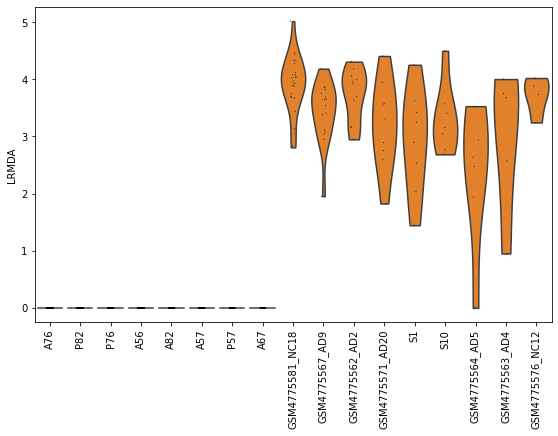

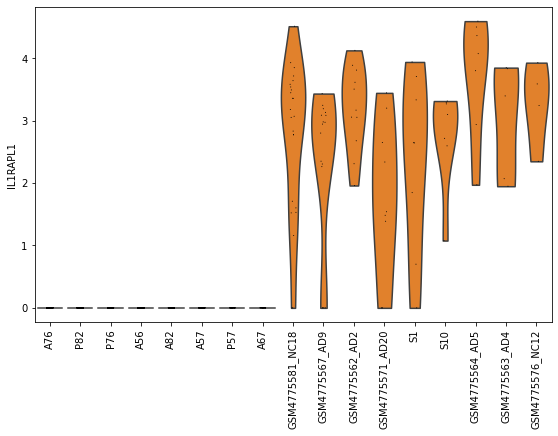

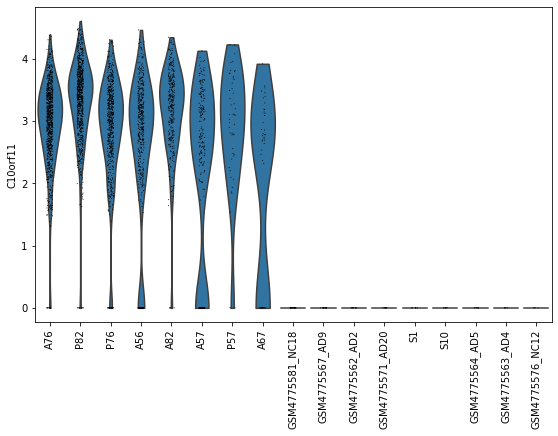

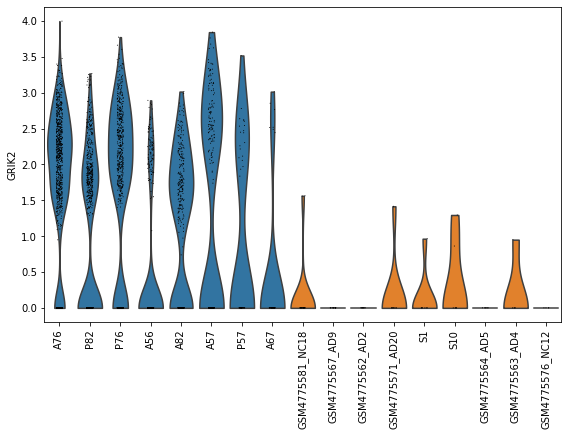

In [ ]:
figsize(8,6)
for i in ['LRMDA','IL1RAPL1','C10orf11','GRIK2']:
    sc.pl.violin(ad,i,groupby='sample',rotation=90)